In [2]:
import os
import shutil
import random
import pandas as pd
import glob
import numpy as np

from PIL import Image

import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split





#### همه فایل ها را از مسیر ای که هستش میریزه توی مسیر دیگه و بگ بگ میکنه و توی همه ۵ تا فایل داره که بعد به فولدر های بگ تقسیم کنه که البته برای اگمنتیشن که یعنی بیشتر یادگرفتن هم دوتا اور لب میاره

In [16]:


# Path to your data folder containing patient sub-folders
data_folder = 'data cleaning/1-100'

# Create a new folder to store the bags
bags_folder = 'data cleaning/Bags'
os.makedirs(bags_folder ,mode=0o666,exist_ok=True)


In [17]:




# Number of images in each bag
images_per_bag = 5

# Overlap between bags
# دوتا در هر فولدر میاری که ی اخری که همه زاویه هارا در نظر بگیره و کامل باشه
overlap = 2

# Iterate over the patient sub-folders
for patient_folder in os.listdir(data_folder):
    # print(patient_folder)
    # 100-میثم خوانچه سپهر

    patient_folder_path = os.path.join(data_folder, patient_folder)
    # print(patient_folder_path)
    # data cleaning/1-100\100-میثم خوانچه سپهر

    # احتمالا چون  نیست اگه نبود خطا بده
    if not os.path.isdir(patient_folder_path):
        continue
    #
    # # Create a new folder for the patient's bags
    patient_bags_folder = os.path.join(bags_folder, f'{patient_folder}_bags')
    # print(patient_bags_folder) # data cleaning/1-100/bags\100-میثم خوانچه سپهر_bags

    os.makedirs(patient_bags_folder, exist_ok=True)

    # # Get a sorted list of all MRI image files for the patient
    mri_files = sorted([file for file in os.listdir(patient_folder_path) if file.endswith('.jpg')])
    total_images = len(mri_files)   # every pationt has some images this shows that
    # print(total_images) #48

    # # Calculate the number of bags for the patient
    # total_images - images_per_bag = 48 - 5 = 43   // 5 - 2 = 3 +1 = 4

    # 43/4 # 10.75 #
    # 43//4 #10
    # in consider of per folder has 5 image with 2 overlap +1
    # (it has 44 images - 5 images_per_bag  = 39 )   //    (5 images_per_bag - 2 =3) =13 +1 = 14 folders
    num_folder_bags = (total_images - images_per_bag) // (images_per_bag - overlap) + 1


    # # Create the bags
    for bag_index in range(num_folder_bags):
        # print('bag_index',bag_index)
        # 0
        # 1
        # 2
        # 3 until 39

    #     # Calculate the start and end indices of the images for the current bag
    #         از کدوم تا کدوم را بگیرم بریزم در یک فولدر  مثلا شماره ۱
        start_index = bag_index * (images_per_bag - overlap)   #  0*3 =0  , 1* 3=3 دفعه بعد از سه اغاز میکنه
        # print('start_index',start_index)
        end_index = start_index + images_per_bag     # از سه تا ۵ میشه ۸ تا
        # print('end_index',end_index)
    #   bag_index 0
    #   start_index 0
    #    end_index 5

        # bag_index 1
        # start_index 3      # از سه آغاز میکنه که دوتا مشترک بیوفته باهاش و چون دوتا اورلب کنه
        # end_index 8

            #

    #     # Create a new bag folder
        bag_folder = os.path.join(patient_bags_folder, f'bag_{bag_index + 1}')
        # print(bag_folder)
        os.makedirs(bag_folder, exist_ok=True)
    #
    #     # Copy the images to the bag folder
        for i in range(start_index, end_index):
            # print('i',i)
            # i 0
            # i 1
            # i 2
            # i 3
            # i 4

            if i < total_images:
                # print('mri_files[i]',mri_files[i]) # mri_files[i] I0000057.jpg

    #             mri_files[i] I0000013.jpg
# i 1
# mri_files[i] I0000014.jpg
# i 2
# mri_files[i] I0000028.jpg
# i 3
# mri_files[i] I0000029.jpg
# i 4
# mri_files[i] I0000030.jpg
# bag_index 1
# start_index 3
# end_index 8
# i 3
# mri_files[i] I0000029.jpg
# i 4
# mri_files[i] I0000030.jpg
# i 5
# mri_files[i] I0000031.jpg
# i 6
# mri_files[i] I0000032.jpg
# i 7
# mri_files[i] I0000033.jpg
    #
    #
    #
    #
                image = mri_files[i]    # I0000033.jpg  ایندکس i مثلا سومی میشه این
                image_path = os.path.join(patient_folder_path, image)   # حلاا جوینش کن
                shutil.copy(image_path, bag_folder)   # کپی کن توی اون فایل

In [18]:
# لیست همه فولدر ها را میده و بر میزنه
# Set a random seed for reproducibility
random.seed(42)  # رندوم را ثابت نگه میداره هر بار همون مقدار باشه
# مثلا همیشه0.45940997490184043

# Get a list of all patient folders
patient_folders = os.listdir(bags_folder)
# Shuffle the patient folders
random.shuffle(patient_folders)
patient_folders

['70-زهره جهرمی پور_bags',
 '58-راحله سکوتی قوزقون بلاغ سفلی_bags',
 '9139131-شهناز رمضانی_bags',
 '116-مجید رستمی_bags',
 '2-معصومه ابراهیم پور داران_bags',
 '142-محمد سپاس زاده_bags',
 '101-میترا دادبه_bags',
 '72-شاهین حاجی نژاد_bags',
 '125-معصومه رفیعی_bags',
 '6-مریم بابالو_bags',
 '78-علی اکبر حسین زاده اقدم ممقانی_bags',
 '117-بهارک رسولی چهرق_bags',
 '47-عذری توکلی فرد_bags',
 '9139125-شهناز رمضانی_bags',
 '46-سعید توانا_bags',
 '9139711-جیران خدابنده یاری_bags',
 '43-ایمان ترابی خرشتمی_bags',
 '3-لیلا آبیار_bags',
 '64-کاظم عباسی_bags',
 '16-هژار-بتوراک_bags',
 '50-سارا جانقربان_bags',
 '71-عصمت حاجی حاجی_bags',
 '37-خدیجه پورصالحی_bags',
 '18-حسین بدری_bags',
 '80-سید مسعود حسینی منفرد_bags',
 '66-غلامرضا عبدالرحیمی_bags',
 '9192263-رضوان سویزی_bags',
 '114-سپهر رحیمی_bags',
 '26-کبری بلوک باشی_bags',
 '77-شهناز حسین پور_bags',
 '60-محسن سلیمی سعید_bags',
 '41-سجاد-پیرمهدی_bags',
 '36-اعظم پورحسینی_bags',
 '30-علی بیرامی لله لو_bags',
 '98-نصرت خلیلیان اشکذری_bags',
 '45-فاط

In [19]:

# os.mkdir('test_dir')

# Check initial permissions (before chmod)



رچسب زدن و خوندن لیبل ها #  ب

In [20]:
# اینجا  لیبل میزنیم

# Path to the report file in XLSX format
report_file = 'data cleaning\\label_.xlsx'



# Read the report file using pandas
df = pd.read_excel(report_file)
my_dict={'normal':0 ,
         'abnormal':1
         }
df['label']=df['State of the Patient'].map(my_dict)


df2=df

df2


,Name of Patient,State of the Patient,label
0,6-مریم بابالو_bags,normal,0
1,13-سینا بختیاری_bags,abnormal,1
2,17-شهناز -بخشنده_bags,abnormal,1
3,21-حسن بریانه_bags,normal,0
4,47-عذری توکلی فرد_bags,normal,0
...,...,...,...
94,9139125-شهناز رمضانی_bags,abnormal,1
95,9139711-جیران خدابنده یاری_bags,normal,0
96,9179377-احمد بخشی_bags,abnormal,1
97,9192263-رضوان سویزی_bags,abnormal,1


In [21]:
# التن باید بفهمیم که از ان اسم هایی که داریم کدومشون توی فولدر ها هستند و کدومشون نیستند .
# برای بعدا ها هم ممکنه مشکل ایجاد کنه


# df['Name of Patient']


In [22]:
# len(patient_folders)
# patient_folders

In [23]:
print(len(df['Name of Patient']))
print(len(patient_folders))


if len(df2['Name of Patient']) != len(patient_folders):
    print(' در فایل اکسل و فولدر ها اعضا برابر نیستند')


99
99


In [24]:
patient_folders

['70-زهره جهرمی پور_bags',
 '58-راحله سکوتی قوزقون بلاغ سفلی_bags',
 '9139131-شهناز رمضانی_bags',
 '116-مجید رستمی_bags',
 '2-معصومه ابراهیم پور داران_bags',
 '142-محمد سپاس زاده_bags',
 '101-میترا دادبه_bags',
 '72-شاهین حاجی نژاد_bags',
 '125-معصومه رفیعی_bags',
 '6-مریم بابالو_bags',
 '78-علی اکبر حسین زاده اقدم ممقانی_bags',
 '117-بهارک رسولی چهرق_bags',
 '47-عذری توکلی فرد_bags',
 '9139125-شهناز رمضانی_bags',
 '46-سعید توانا_bags',
 '9139711-جیران خدابنده یاری_bags',
 '43-ایمان ترابی خرشتمی_bags',
 '3-لیلا آبیار_bags',
 '64-کاظم عباسی_bags',
 '16-هژار-بتوراک_bags',
 '50-سارا جانقربان_bags',
 '71-عصمت حاجی حاجی_bags',
 '37-خدیجه پورصالحی_bags',
 '18-حسین بدری_bags',
 '80-سید مسعود حسینی منفرد_bags',
 '66-غلامرضا عبدالرحیمی_bags',
 '9192263-رضوان سویزی_bags',
 '114-سپهر رحیمی_bags',
 '26-کبری بلوک باشی_bags',
 '77-شهناز حسین پور_bags',
 '60-محسن سلیمی سعید_bags',
 '41-سجاد-پیرمهدی_bags',
 '36-اعظم پورحسینی_bags',
 '30-علی بیرامی لله لو_bags',
 '98-نصرت خلیلیان اشکذری_bags',
 '45-فاط

In [25]:
# name='65-منصور عباسی_bags'
#
# name in df['Name of Patient'].tolist()
#


# یه بررسی میکنیم ببینیم که ایا همه اعضا منطبق هستند یا نه

In [26]:

def compare_2_lists(first_list,sec_list ):
    '''
    # تابعی که افراد درون لیست را میگیره و مقایسه میکنه کدومشون در لیست اول هست و در لیست دوم نیست یا برعکس که در نهایت یه تاپل میده که عنصر نخستش میشه اونا که در لیست اول هستند و در لیست دوم نیستند و دوم  هم اونای که در دوم هستند  و در اول نیستند.
    اگر دو تا لیست خالی داد یعنی یا همشون منطبق هستند یا هیچکدوم منطبق نیستند
    '''
    members1_not_in2=[member1 for member1 in first_list if member1 not in  sec_list ]
    members2_not_in1=[member2 for member2 in sec_list if member2 not in first_list]
    return members1_not_in2 , members2_not_in1



# حالا ببینیم که ایا کدوم اعضا هستند که در اولی هستند و دومی نیستند
members_in_excel_not_in_folder=compare_2_lists(df['Name of Patient'].tolist() ,patient_folders )[0]
members_in_folders_not_in_excels= compare_2_lists(df['Name of Patient'].tolist() ,patient_folders )[1]
members_in_excel_not_in_folder , members_in_folders_not_in_excels





([], [])

In [27]:
members_in_folders_not_in_excels

[]

In [28]:
members_in_excel_not_in_folder

[]

In [29]:
len(members_in_folders_not_in_excels)

0

In [30]:


class CustomError(Exception):
    pass
# if  not ( members_in_folders_not_in_excels and   members_in_excel_not_in_folder):
if  len(members_in_folders_not_in_excels)  or  len(members_in_excel_not_in_folder):
    raise  CustomError ('   تعداد افراد در فایل اکسل و افراد در فولدر ها برابر نیستند لطفا در لیست انها را  در بالای همین کد بررسی کنید')


In [31]:
# def delete_folders_based_name_lists()




# اغاز فاز ۱ را ریختن

In [32]:
suffix='_phase_'




In [33]:

# کپی میکنیم فایل ها را در فولدر فاز ۱ و پسوند بهشون اضافه میکنیم

bags_folder = 'data cleaning\\Bags'
data_folder = 'data cleaning\\phase 1\\bags'
# data_folder=os.path.join(data_folder,)
os.makedirs(data_folder, exist_ok=True,mode=0o666)

for src_folder in os.listdir(bags_folder):
    src_folder_path = os.path.join(bags_folder, src_folder)
    # print(src_folder_path) #data cleaning\Bags\90-عباس خانی_bags

    # print(src_folder ) #9192263-رضوان سویزی_bags
    dst_folder = src_folder + f'{suffix}' # اینو اضافه میکنیم به ته هر مدوم از فولدر ها که مشخص باشه در این فولدر هستش
    dst_folder_path =os.path.join(data_folder,dst_folder)

    # # فودرو کپی میکنیم توی فاز ۱
    shutil.copytree(src=src_folder_path,dst=dst_folder_path,dirs_exist_ok=True)


In [34]:
os.listdir(data_folder)

['100-میثم خوانچه سپهر_bags_phase_',
 '101-میترا دادبه_bags_phase_',
 '103-محمد مهدی دشتکی_bags_phase_',
 '105-زهرا دل خسته_bags_phase_',
 '106-ریحانه دوستدار_bags_phase_',
 '11-احمد باقی زاده_bags_phase_',
 '111-پارسا رحیم خانی_bags_phase_',
 '112-احمد رحیمی آزاد_bags_phase_',
 '114-سپهر رحیمی_bags_phase_',
 '116-مجید رستمی_bags_phase_',
 '117-بهارک رسولی چهرق_bags_phase_',
 '118-زهره رسولی_bags_phase_',
 '12-ابوالفضل بالنده_bags_phase_',
 '120-حسین رضازاده فر_bags_phase_',
 '122-فرنوش رضائی جونقانی_bags_phase_',
 '125-معصومه رفیعی_bags_phase_',
 '128-توران رنجبری_bags_phase_',
 '13-سینا بختیاری_bags_phase_',
 '130-حجت زارع زاده مهریزی_bags_phase_',
 '131-نرگس خاتون زارع لکه دیزجی_bags_phase_',
 '132-زارع جواد_bags_phase_',
 '134-مهدیه زارعیان_bags_phase_',
 '135-نوشین زارعی_bags_phase_',
 '136-آمنه زاهدریگی_bags_phase_',
 '137-حمید زلفی کوپس_bags_phase_',
 '139-خداداد زینلی_bags_phase_',
 '142-محمد سپاس زاده_bags_phase_',
 '144-امیر سحری_bags_phase_',
 '145-امیرحمزه سرابندی_bags_phas

In [35]:
df2=df

# Assuming df2 is your DataFrame
df2['Name of Patient'] = df2['Name of Patient'].apply(lambda x: x if x.endswith(f'{suffix}') else f"{x}{suffix}")
df2

,Name of Patient,State of the Patient,label
0,6-مریم بابالو_bags_phase_,normal,0
1,13-سینا بختیاری_bags_phase_,abnormal,1
2,17-شهناز -بخشنده_bags_phase_,abnormal,1
3,21-حسن بریانه_bags_phase_,normal,0
4,47-عذری توکلی فرد_bags_phase_,normal,0
...,...,...,...
94,9139125-شهناز رمضانی_bags_phase_,abnormal,1
95,9139711-جیران خدابنده یاری_bags_phase_,normal,0
96,9179377-احمد بخشی_bags_phase_,abnormal,1
97,9192263-رضوان سویزی_bags_phase_,abnormal,1


In [36]:
patient_folders_list = os.listdir(data_folder)
patient_folders_list

['100-میثم خوانچه سپهر_bags_phase_',
 '101-میترا دادبه_bags_phase_',
 '103-محمد مهدی دشتکی_bags_phase_',
 '105-زهرا دل خسته_bags_phase_',
 '106-ریحانه دوستدار_bags_phase_',
 '11-احمد باقی زاده_bags_phase_',
 '111-پارسا رحیم خانی_bags_phase_',
 '112-احمد رحیمی آزاد_bags_phase_',
 '114-سپهر رحیمی_bags_phase_',
 '116-مجید رستمی_bags_phase_',
 '117-بهارک رسولی چهرق_bags_phase_',
 '118-زهره رسولی_bags_phase_',
 '12-ابوالفضل بالنده_bags_phase_',
 '120-حسین رضازاده فر_bags_phase_',
 '122-فرنوش رضائی جونقانی_bags_phase_',
 '125-معصومه رفیعی_bags_phase_',
 '128-توران رنجبری_bags_phase_',
 '13-سینا بختیاری_bags_phase_',
 '130-حجت زارع زاده مهریزی_bags_phase_',
 '131-نرگس خاتون زارع لکه دیزجی_bags_phase_',
 '132-زارع جواد_bags_phase_',
 '134-مهدیه زارعیان_bags_phase_',
 '135-نوشین زارعی_bags_phase_',
 '136-آمنه زاهدریگی_bags_phase_',
 '137-حمید زلفی کوپس_bags_phase_',
 '139-خداداد زینلی_bags_phase_',
 '142-محمد سپاس زاده_bags_phase_',
 '144-امیر سحری_bags_phase_',
 '145-امیرحمزه سرابندی_bags_phas

In [37]:
# حالا ببینیم که ایا کدوم اعضا هستند که در اولی هستند و دومی نیستند
members_in_excel_not_in_folder=compare_2_lists(df2['Name of Patient'].tolist() ,patient_folders_list )[0]
members_in_folders_not_in_excels= compare_2_lists(df2['Name of Patient'].tolist() ,patient_folders_list )[1]
print(members_in_excel_not_in_folder , members_in_folders_not_in_excels)


if  len(members_in_folders_not_in_excels)  or  len(members_in_excel_not_in_folder):
    raise  CustomError ('   تعداد افراد در فایل اکسل و افراد در فولدر ها برابر نیستند لطفا در لیست انها را  در بالای همین کد بررسی کنید')



# اگر ارور نبود ببر ترین و تست را تقسیم کن

[] []


# حالا تست و ترین

In [38]:
# Output folder for train and test sets

data_folder_patient_phase1=os.listdir(data_folder)
# Train-test split ratio
train_ratio = 0.8
# Calculate the number of patients in the train and test sets
num_train_patients = int(train_ratio * len(data_folder_patient_phase1))
num_test_patients = len(data_folder_patient_phase1) - num_train_patients




In [39]:
# 84 IS NUMBER of pations
num_train_patients

79

In [40]:
# is number of test pationt
num_test_patients

20

In [41]:
# حالا که بر زد تقسیم میکنش . عملا در نهایت ۲۰ درصد را رندوم بر میداره تست و ۸۰ درصد را برمیداره ترین
# Split the patient folders into train and test sets
train_patients = data_folder_patient_phase1[:num_train_patients]
test_patients = data_folder_patient_phase1[num_train_patients:]
train_patients  # اینها را میفرستیم توی فولدر ترین

['100-میثم خوانچه سپهر_bags_phase_',
 '101-میترا دادبه_bags_phase_',
 '103-محمد مهدی دشتکی_bags_phase_',
 '105-زهرا دل خسته_bags_phase_',
 '106-ریحانه دوستدار_bags_phase_',
 '11-احمد باقی زاده_bags_phase_',
 '111-پارسا رحیم خانی_bags_phase_',
 '112-احمد رحیمی آزاد_bags_phase_',
 '114-سپهر رحیمی_bags_phase_',
 '116-مجید رستمی_bags_phase_',
 '117-بهارک رسولی چهرق_bags_phase_',
 '118-زهره رسولی_bags_phase_',
 '12-ابوالفضل بالنده_bags_phase_',
 '120-حسین رضازاده فر_bags_phase_',
 '122-فرنوش رضائی جونقانی_bags_phase_',
 '125-معصومه رفیعی_bags_phase_',
 '128-توران رنجبری_bags_phase_',
 '13-سینا بختیاری_bags_phase_',
 '130-حجت زارع زاده مهریزی_bags_phase_',
 '131-نرگس خاتون زارع لکه دیزجی_bags_phase_',
 '132-زارع جواد_bags_phase_',
 '134-مهدیه زارعیان_bags_phase_',
 '135-نوشین زارعی_bags_phase_',
 '136-آمنه زاهدریگی_bags_phase_',
 '137-حمید زلفی کوپس_bags_phase_',
 '139-خداداد زینلی_bags_phase_',
 '142-محمد سپاس زاده_bags_phase_',
 '144-امیر سحری_bags_phase_',
 '145-امیرحمزه سرابندی_bags_phas

In [42]:
train_folder = 'data cleaning/phase 1/train'
test_folder = 'data cleaning/phase 1/test'
# Create train and test folders
os.makedirs(train_folder, exist_ok=True ,mode=0o666)
os.makedirs(test_folder, exist_ok=True,mode=0o666)


In [43]:
# Move patient folders to train set
# اینجا اون اسم های ۸۰ درصد را از فولدر بگز میبره توی فولدر ترین
for patient_folder in train_patients:
    patient_src_folder = os.path.join(data_folder, patient_folder)
    # print(patient_src_folder)  #data cleaning\phase 1\bags\60-محسن سلیمی سعید_bags

    # اینم مسیرشو میسازیم  که بفرسته ترین هارا که نصف کرده و بر زده
    # ولی نفهمیدم چرا ترتیب را وقتی که داره عوض میکنه جابجا نوشته و درست کار میکنه چون اول ترین را اورده بعد پیشن را برعکس بالا
    patient_dst_folder = os.path.join(train_folder, patient_folder)
    # print(patient_dst_folder)  #data cleaning/phase 1/train\60-محسن سلیمی سعید_bags
    # os.chmod(patient_dst_folder, 0o666)

    # اگر وجود داشت حذفش کن مقصد را
    if os.path.exists(patient_dst_folder):
        # print(' از پیش وجود داشته')
        shutil.rmtree(patient_dst_folder)


    # برای Octal
    os.chmod(patient_src_folder, 0o666)  #
    #
    # # 0o6 octal numbers
    # #     0 - No permission
    # # 1 - Execute permission
    # # 2 - Write permission
    # # 4 - Read permission
    # #  granting read and write access (4 + 2 = 6)
    # # The first digit 6 corresponds to the owner's permissions,
    # # the second digit 6 corresponds to the group's permissions,
    # # The third digit 6 corresponds to others' permissions,
    # # برای اینه که مودشو تغیر بدیم یعنی بتونه مجوز های تغیر را هم بیاره و موو خالی برای همه ممکنه نباشه
    #
    shutil.move(patient_src_folder, patient_dst_folder,)
    os.chmod(patient_dst_folder, 0o666)


In [44]:





# همون کارو برای تست انجام میدیم


# Move patient folders to test set
for patient_folder in test_patients:
    patient_src_folder = os.path.join(data_folder, patient_folder)
    patient_dst_folder = os.path.join(test_folder, patient_folder)

    if os.path.exists(patient_dst_folder):
        shutil.rmtree(patient_dst_folder)

    os.chmod(patient_src_folder, 0o666)  #
    shutil.move(patient_src_folder, patient_dst_folder)
    os.chmod(patient_dst_folder, 0o666)  #


In [45]:
# Get the names of patients for train and test sets
# x_train = train_patients
# x_test = test_patients
#
# # Print the numbers of train and test patients
# print(f"Number of Train Patients: {num_train_patients}")
# print(f"Number of Test Patients: {num_test_patients}")
#
#

# بهتره بریم توی فایل ترین و تست اینو بگیرم و تعدادشونو اخر شاید اصن نرفته باشه توش
x_train_new=os.listdir(train_folder)
print('len of all train patients:',len(x_train_new))
# print('list of all train patients:',(x_train_new))

x_test_new=os.listdir(test_folder)
print('len of all train patients:',len(x_test_new))


len of all train patients: 79
len of all train patients: 20


In [46]:
# x_train_new

# فاز ۱ را منتقل کردیم همه فایلهاشو و تست و ترین را درست کردیم واسشون

In [47]:


# df2['Name of Patient']=df2['Name of Patient']+'_phase'

In [48]:

#

# مدل سازی

In [49]:
#hyperparameters

input_shape = (575,575)
epochs = 10
batch_size = 20

In [50]:
# pip install --upgrade tensorflow

In [51]:
# pip install tensorflow-gpu --upgrade

In [52]:
#import keras

In [53]:



model = Sequential()

# Input layer (adjust input_shape based on your image dimensions)
model.add(Flatten(input_shape=(input_shape)))

# First hidden layer
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(.2))  # Optional dropout for regularization

# Second hidden layer
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))

# Output layer for 2 classes
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 330625)            0         
                                                                 
 dense (Dense)               (None, 64)                21160064  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21164354 (80.74 MB)
Trainable params: 21164354 (80.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [56]:

# Define image dimensions based on your data
img_width, img_height = 512, 512  # You can adjust these values based on your image size

# Create an ImageDataGenerator object
train_datagen = ImageDataGenerator(rescale=1./255,  # Rescale pixel values to [0, 1]
                                   shear_range=0.2,  # Optionally apply random shear transformations
                                   zoom_range=0.2,   # Optionally apply random zoom transformations
                                   horizontal_flip=True)  # Optionally apply random horizontal flips

# Use the ImageDataGenerator to flow data from your training directory
train_generator = train_datagen.flow_from_directory(
    'data cleaning\\phase 1\\train',  # Replace with your training folder path
    target_size=(img_width, img_height),  # Set target image size
    batch_size=batch_size,  # Set batch size as defined earlier
    class_mode='categorical'  # Use categorical mode for multi-class classification
)
# Found 6120 images belonging to 81 classes.

Found 5920 images belonging to 79 classes.


In [57]:


# !pip install scikit-learn


# Define image dimensions
img_width, img_height = 512, 512

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
  img = load_img(img_path, target_size=(img_width, img_height))
  img_array = img_to_array(img)
  img_array = img_array / 255.0
  return img_array



In [58]:
# os.listdir('../data cleaning/phase 3/train')

In [59]:
# os.path.join('../data cleaning/phase 3/train','../data cleaning/phase 3/train', )

In [60]:
# os.listdir('../data cleaning/phase 3/train')

In [61]:
# os.listdir('../data cleaning/phase 3/train')[0]

In [62]:
# mamamd = os.path.join('../data cleaning/phase 3/train',os.listdir('../data cleaning/phase 3/train')[0])

In [63]:

# Load training data from your training directory
# for class_name in os.listdir('../data cleaning/phase 3/train'):
#     class_path = os.path.join('../data cleaning/phase 3/train', class_name)
#     print(class_path)

In [64]:
# Lists to store data (replace with your data paths)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [65]:
import pandas as pd
import os
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Assuming you're using TensorFlow

# Define image dimensions
img_width, img_height = 512, 512

# Create a dictionary to map patient names to labels (0 or 1 based on your data)
label_mapping = dict(zip(df2['Name of Patient'], df2['State of the Patient'].map({'normal': 0, 'abnormal': 1})))  # Assuming these columns exist


In [66]:
# Function to load and preprocess an image with error handling
def load_and_preprocess_image(img_path):
  """Loads and preprocesses an image.

  Args:
      img_path: Path to the image file.

  Returns:
      A NumPy array representing the preprocessed image, or None if loading fails.
  """
  try:
    img = load_img(img_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array
  except Exception as e:
    print(f"Error loading image: {img_path} - {e}")
    return None

# Separate lists for train and test data
train_images = []
train_labels = []

test_images = []
test_labels = []

# Train folder path
train_folder = "data cleaning/phase 1/train"

# Test folder path
test_folder = "data cleaning/phase 1/test"

# Function to process a patient's data (can be reused for train and test)
def process_patient_data(folder_path, data_images, data_labels):
  for patient_name in os.listdir(folder_path):
    patient_path = os.path.join(folder_path, patient_name)

    # Check if label exists for the patient
    label = label_mapping.get(patient_name)
    if label is None:
      print(f"Warning: Label not found for patient: {patient_name}")
      continue  # Skip this patient if label is missing

    # Loop through "bags" folders within the patient's folder
    for bag_folder in os.listdir(patient_path):
      bags_path = os.path.join(patient_path, bag_folder)

      # Check if "bags" folder exists
      if os.path.isdir(bags_path):
        # Loop through image paths in the "bags" folder
        for img_path in glob(os.path.join(bags_path, "*.jpg")):
          preprocessed_image = load_and_preprocess_image(img_path)
          if preprocessed_image is not None:
            data_images.append(preprocessed_image)
            data_labels.append(label)
      else:
        print(f"Warning: 'bags' folder not found for patient: {patient_name}, bag: {bag_folder}")

# Process data for training set
process_patient_data(train_folder, train_images, train_labels)

# Process data for test set
process_patient_data(test_folder, test_images, test_labels)

In [67]:
train_images

[array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [68]:
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [69]:
len(test_images)

1590

In [70]:
len(test_labels)

1590

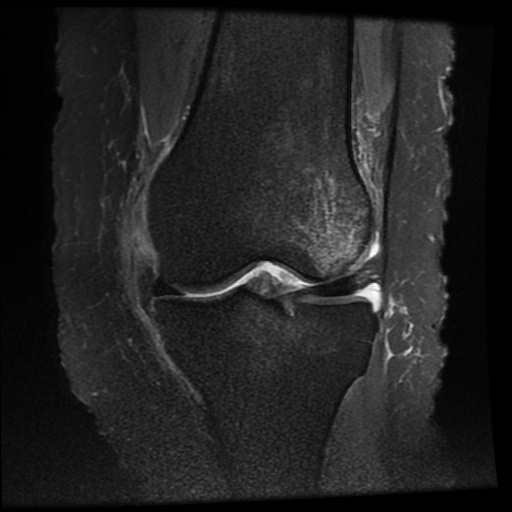

In [71]:
load_img('data cleaning/phase 1/train/3-لیلا آبیار_bags_phase_/bag_3/I0000035.jpg', target_size=(img_width, img_height))

In [72]:

# this is for getting images
#
# # Load training data from your training directory
# for patient_name in os.listdir(test_folder):
#     patient_path = os.path.join(test_folder, patient_name)
#
#     for bags_folder in os.listdir(patient_path):
#         bags_path = os.path.join(patient_path, bags_folder)
#
#         for img_path in glob.glob(os.path.join(bags_path, '*.jpg')):
#
#             img = load_and_preprocess_image(img_path)
#             test_images.append(img)
#             test_labels.append(patient_name)  # Assuming patient_name represents the label
#



In [73]:



# Split training data into training and testing sets (e.g., 80% training, 20% testing)
# x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)




In [74]:
# df_train=df2[df2['Name of Patient'].isin(y_train)]
# df_train

In [75]:
# df_train.drop(columns=['Name of Patient','State of the Patient'],inplace=True)

In [76]:
# y_train=df_train['label'].to_list()
# y_train

In [77]:
# len(y_test)

In [78]:
from tensorflow.keras.optimizers import Adam , SGD

In [79]:
initial_learning_rate = 0.0000001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.98, staircase=True)

In [80]:
# Compile the model

optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
# ... (rest of your code)

# # Train the model
# history = model.fit(
#     train_images,
#     train_labels,
#     epochs=epochs,
#     batch_size=batch_size,
#     validation_data=(test_images, test_labels)
# )
#
#


In [86]:

from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.utils import to_categorical
from vit_keras import vit

In [88]:
# Enable mixed-precision training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [90]:
# Define Vision Transformer model
vit_model = vit.vit_b16(
    image_size=(512,512),
    activation='softmax',  # Activation for final prediction
    pretrained=True,  # Use pre-trained weights if available
    include_top=False,  # Exclude classification head
    pretrained_top=False,  # Exclude top (classification) layers
)

347502902/347502902 [==============================] - 1562s 4us/step


E:\khanabadi_company2\venv\Lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 32, 32
  warnings.warn(


In [93]:
# Build the neural network model for classification
image_size = (512, 512)
image_input = Input(shape=image_size + (3,))
tabular_input = Input(shape=(train_labels [1],))

In [95]:
# Assuming train_images is a list of NumPy arrays representing images
first_image = train_images[0]  # Access the first image in the list
image_shape = first_image.shape  # Get the shape of the first image (e.g., (512, 512, 3))

# Assuming all images have the same shape
image_input = Input(shape=image_shape)


In [99]:

# Build the neural network model for classification
image_size = (512, 512)
image_input = Input(shape=image_size + (3,))
tabular_input = Input(shape=(train_labels[1],))

In [100]:
# ViT for feature extraction
image_features_vit = vit_model(image_input)
flatten_vit = tf.keras.layers.Flatten()(image_features_vit)

In [101]:
# ViT for feature extraction
image_features_vit = vit_model(image_input)
flatten_vit = tf.keras.layers.Flatten()(image_features_vit)

In [102]:
# Freeze ViT layers if needed
for layer in vit_model.layers:
    layer.trainable = False


In [103]:
# Unfreeze the last 20 layers of the ViT model for fine-tuning
for layer in vit_model.layers[-10:]:
    layer.trainable = True

In [104]:
# Use ViT model as image feature extractor
image_features = vit_model(image_input)
flatten1 = tf.keras.layers.Flatten()(image_features)

In [105]:
cnn_model = tf.keras.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
])

In [106]:
# Extract features using CNN
image_features_cnn = cnn_model(image_input)

In [107]:
# Combine features from ViT and CNN
concatenated_features = concatenate([flatten_vit, image_features_cnn])

In [109]:
# Additional layers for classification using the combined features
dense_combined = Dense(128, activation='relu')(concatenated_features)
num_class=2
output = Dense(num_class, activation='softmax')(dense_combined)  # Softmax for multi-class classification

In [110]:
# Create a model for classification using the combined features
combined_model = Model(inputs=image_input, outputs=output)
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 vit-b16 (Functional)        (None, 768)                  8643456   ['input_6[0][0]']             
                                                          0                                       
                                                                                                  
 flatten_2 (Flatten)         (None, 768)                  0         ['vit-b16[1][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 123008)               5088      ['input_6[0][0]']         

In [111]:
# Define the learning rate schedule for decay
initial_learning_rate = 0.0000001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.98, staircase=True)

In [112]:
# Compile the model
optimizer = Adam(learning_rate=lr_schedule)
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
# Train the model
history_combined = combined_model.fit(np.array(train_images), train_labels, epochs=50, batch_size=16, validation_split=0.2)

MemoryError: Unable to allocate 17.3 GiB for an array with shape (5920, 512, 512, 3) and data type float32

In [124]:
# np.array(train_images)

In [125]:
# np.array(train_labels)